# Gaussian Process Regression with GpABC.jl

In [1]:
using GpABC, Distributions, Plots

Define the latent function:

In [2]:
f(x) = x * x + 10 * sin(x) 

f (generic function with 1 method)

Set up some training and test data

In [3]:
n = 30
training_x = sort(rand(Uniform(-10, 10), n))
training_y = f.(training_x)
training_y += 20 * (rand(n) .- 0.5) # add some noise
test_x =range(min(training_x...), stop=max(training_x...), length=1000) |> collect;


`SquaredExponentialIsoKernel` will be used by default. Assume we already know its hyperparameters:

$$
\begin{align*}
    \sigma_f &= 37.08 \\
    l &= 1.0 \\
    \sigma_n &= 6.58
\end{align*}
$$

In [4]:
hypers = [37.08, 1.0, 6.58];

Run the regression and plot the results

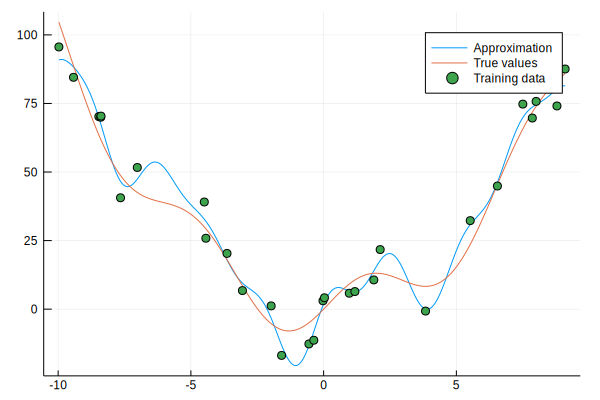

In [5]:
gpm = GPModel(training_x, training_y)
set_hyperparameters(gpm, hypers)
(test_y, test_var) = gp_regression(test_x, gpm)

plot(test_x, [test_y f.(test_x)], labels=["Approximation"; "True values"])
scatter!(training_x, training_y, label="Training data")